In [7]:
# Eddie Cumart Ice Cream Business Analysis

**Merging Similar Business Names and Analyzing Complaint Patterns**

This analysis focuses on NYC Soft Ice Cream businesses owned by Eddie Cumart, which appear to have multiple name variations in the dataset that should be merged for accurate analysis.


SyntaxError: invalid syntax (532375114.py, line 3)

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print("Ready to analyze Eddie Cumart ice cream business complaints 🍦")


Libraries imported successfully!
Ready to analyze Eddie Cumart ice cream business complaints 🍦


In [9]:
# Load the dataset
df = pd.read_csv('DCWP_Consumer_Complaints_20250623.csv')

print(f"Dataset loaded successfully!")
print(f"Total complaints in dataset: {len(df):,}")

# Find all Eddie Cumart related businesses
eddie_businesses = df[df['Business Name'].str.contains('Eddie Cumart', case=False, na=False)]

print(f"\n🔍 FOUND EDDIE CUMART BUSINESS VARIATIONS:")
print("=" * 60)
eddie_name_counts = eddie_businesses['Business Name'].value_counts()
for name, count in eddie_name_counts.items():
    print(f"• {name:<50} ({count:>3} complaints)")

print(f"\nTotal Eddie Cumart complaints before merging: {len(eddie_businesses):,}")
print(f"Number of name variations: {len(eddie_name_counts)}")


Dataset loaded successfully!
Total complaints in dataset: 43,594

🔍 FOUND EDDIE CUMART BUSINESS VARIATIONS:
• NYC Soft Ice Cream Truck owned by Eddie Cumart     (189 complaints)
• NYC Soft Ice Cream Trucks owned by Eddie Cumart    (119 complaints)
• NYC Soft Ice Cream trucks owned by Eddie Cumart    ( 25 complaints)
• NYC Soft Ice Cream Trucks (owned by Eddie Cumart)  (  3 complaints)
• NYC Soft Ice cream trucks owned by Eddie Cumart    (  2 complaints)
• Mister Softee Ice Cream Truck owned by Eddie Cumart (  1 complaints)
• NYC Soft Ice Cream trucks (owned by Eddie Cumart)  (  1 complaints)

Total Eddie Cumart complaints before merging: 340
Number of name variations: 7


In [10]:
# Create a copy of the dataframe for merging
df_merged = df.copy()

# Define the standardized name for Eddie Cumart's business
STANDARD_NAME = "NYC Soft Ice Cream Truck owned by Eddie Cumart"

print(f"🔄 MERGING EDDIE CUMART BUSINESS NAMES:")
print("=" * 50)
print(f"Standardizing all variations to: '{STANDARD_NAME}'")

# Find all rows with Eddie Cumart businesses and update the name
eddie_mask = df_merged['Business Name'].str.contains('Eddie Cumart', case=False, na=False)
original_count = eddie_mask.sum()

# Update all Eddie Cumart business names to the standard name
df_merged.loc[eddie_mask, 'Business Name'] = STANDARD_NAME

# Verify the merge
eddie_merged = df_merged[df_merged['Business Name'] == STANDARD_NAME]

print(f"✅ Merge completed!")
print(f"• Original Eddie Cumart complaints: {original_count}")
print(f"• Merged Eddie Cumart complaints: {len(eddie_merged)}")
print(f"• Unique business names reduced from {len(eddie_name_counts)} to 1")

# Show the merged business in context of all businesses
top_businesses_after_merge = df_merged['Business Name'].value_counts().head(10)
eddie_rank = top_businesses_after_merge.rank(ascending=False)[STANDARD_NAME] if STANDARD_NAME in top_businesses_after_merge.index else "Not in top 10"

print(f"\n📊 EDDIE CUMART'S RANKING AFTER MERGE:")
print(f"• Now ranks #{int(eddie_rank)} in NYC with {len(eddie_merged)} total complaints")
print(f"• This makes it the #{int(eddie_rank)} most complained-about business in NYC!")


🔄 MERGING EDDIE CUMART BUSINESS NAMES:
Standardizing all variations to: 'NYC Soft Ice Cream Truck owned by Eddie Cumart'
✅ Merge completed!
• Original Eddie Cumart complaints: 340
• Merged Eddie Cumart complaints: 340
• Unique business names reduced from 7 to 1

📊 EDDIE CUMART'S RANKING AFTER MERGE:
• Now ranks #1 in NYC with 340 total complaints
• This makes it the #1 most complained-about business in NYC!


In [11]:
## 📋 All Complaints for Eddie Cumart's Ice Cream Business

**Complete Dataset of All 340 Complaints**


SyntaxError: invalid syntax (2446576213.py, line 3)

In [12]:
# Display all Eddie Cumart complaints
print(f"📋 ALL {len(eddie_merged)} COMPLAINTS FOR EDDIE CUMART'S ICE CREAM BUSINESS")
print("=" * 80)

# Convert dates for better display
eddie_display = eddie_merged.copy()
eddie_display['Intake Date'] = pd.to_datetime(eddie_display['Intake Date'], errors='coerce')
eddie_display['Result Date'] = pd.to_datetime(eddie_display['Result Date'], errors='coerce')

# Select most relevant columns for display
key_columns = [
    'Record ID', 'Intake Date', 'Intake Channel', 'Business Category', 
    'Complaint Code', 'Result', 'Referred To', 'Borough', 'Postcode', 
    'Street1', 'City', 'Refund Amount', 'Contract Cancelled Amount'
]

# Filter to available columns
available_columns = [col for col in key_columns if col in eddie_display.columns]
eddie_display_selected = eddie_display[available_columns]

print(f"Showing {len(available_columns)} key columns out of {len(eddie_display.columns)} total columns")
print(f"(Use .columns to see all available columns)")
print("\n")

# Display all rows
for i, (idx, row) in enumerate(eddie_display_selected.iterrows(), 1):
    print(f"COMPLAINT #{i} (Record ID: {row['Record ID']})")
    print("-" * 50)
    for col in available_columns:
        value = row[col]
        if pd.isna(value):
            value = "Not Available"
        elif col in ['Intake Date', 'Result Date'] and not pd.isna(value):
            value = value.strftime('%Y-%m-%d') if hasattr(value, 'strftime') else str(value)
        print(f"  {col:<25}: {value}")
    print("\n")

print(f"📊 SUMMARY: Displayed all {len(eddie_merged)} complaints for Eddie Cumart's ice cream business")


📋 ALL 340 COMPLAINTS FOR EDDIE CUMART'S ICE CREAM BUSINESS
Showing 13 key columns out of 33 total columns
(Use .columns to see all available columns)


COMPLAINT #1 (Record ID: 050286-2024-CMPL)
--------------------------------------------------
  Record ID                : 050286-2024-CMPL
  Intake Date              : 2024-11-05
  Intake Channel           : 311
  Business Category        : Misc Non-Food Retail
  Complaint Code           : Unlicensed
  Result                   : Complaint Review Complete
  Referred To              : Not Available
  Borough                  : Brooklyn
  Postcode                 : 11201
  Street1                  : WASHINGTON STREET
  City                     : Brooklyn
  Refund Amount            : Not Available
  Contract Cancelled Amount: Not Available


COMPLAINT #2 (Record ID: 049257-2024-CMPL)
--------------------------------------------------
  Record ID                : 049257-2024-CMPL
  Intake Date              : 2024-10-20
  Intake Channel     

/var/folders/06/fr02k8p12_z2m6sdrpjqt7zr0000gn/T/ipykernel_54431/215417757.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eddie_display['Intake Date'] = pd.to_datetime(eddie_display['Intake Date'], errors='coerce')
/var/folders/06/fr02k8p12_z2m6sdrpjqt7zr0000gn/T/ipykernel_54431/215417757.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eddie_display['Result Date'] = pd.to_datetime(eddie_display['Result Date'], errors='coerce')


In [13]:
## 📊 Analysis of Eddie Cumart's Ice Cream Business Complaints

**Pattern Analysis and Key Insights**


SyntaxError: invalid syntax (370397497.py, line 3)

In [14]:
# Analyze patterns in Eddie Cumart's complaints
print("📊 EDDIE CUMART COMPLAINT ANALYSIS")
print("=" * 50)

# Clean dates for analysis
eddie_analysis = eddie_merged.copy()
eddie_analysis['Intake Date'] = pd.to_datetime(eddie_analysis['Intake Date'], errors='coerce')
eddie_analysis['Result Date'] = pd.to_datetime(eddie_analysis['Result Date'], errors='coerce')

# Basic statistics
print(f"🔢 BASIC STATISTICS:")
print(f"• Total complaints: {len(eddie_analysis)}")
print(f"• Date range: {eddie_analysis['Intake Date'].min()} to {eddie_analysis['Intake Date'].max()}")
print(f"• Unique complaint codes: {eddie_analysis['Complaint Code'].nunique()}")

# Most common complaint types
print(f"\n📝 TOP COMPLAINT TYPES:")
complaint_types = eddie_analysis['Complaint Code'].value_counts()
for i, (complaint, count) in enumerate(complaint_types.head(10).items(), 1):
    percentage = (count / len(eddie_analysis)) * 100
    print(f"{i:2d}. {complaint:<40} ({count:>3} cases, {percentage:>4.1f}%)")

# Geographic distribution
print(f"\n🗽 GEOGRAPHIC DISTRIBUTION:")
borough_dist = eddie_analysis['Borough'].value_counts()
for borough, count in borough_dist.items():
    percentage = (count / len(eddie_analysis)) * 100
    print(f"• {borough:<12}: {count:>3} complaints ({percentage:>4.1f}%)")

# Top ZIP codes
print(f"\n📍 TOP ZIP CODES:")
zip_dist = eddie_analysis['Postcode'].value_counts().head(10)
for zip_code, count in zip_dist.items():
    percentage = (count / len(eddie_analysis)) * 100
    print(f"• ZIP {zip_code}: {count:>3} complaints ({percentage:>4.1f}%)")

# Resolution outcomes
print(f"\n⚖️ COMPLAINT OUTCOMES:")
outcomes = eddie_analysis['Result'].value_counts()
for outcome, count in outcomes.items():
    percentage = (count / len(eddie_analysis)) * 100
    print(f"• {outcome:<30}: {count:>3} cases ({percentage:>4.1f}%)")

# Intake channels
print(f"\n📞 COMPLAINT CHANNELS:")
channels = eddie_analysis['Intake Channel'].value_counts()
for channel, count in channels.items():
    percentage = (count / len(eddie_analysis)) * 100
    print(f"• {channel:<15}: {count:>3} complaints ({percentage:>4.1f}%)")

# Financial impact
refunds = eddie_analysis[eddie_analysis['Refund Amount'].notna() & (eddie_analysis['Refund Amount'] > 0)]
cancellations = eddie_analysis[eddie_analysis['Contract Cancelled Amount'].notna() & (eddie_analysis['Contract Cancelled Amount'] > 0)]

print(f"\n💰 FINANCIAL IMPACT:")
if len(refunds) > 0:
    print(f"• Complaints with refunds: {len(refunds)}")
    print(f"• Total refund amount: ${refunds['Refund Amount'].sum():,.2f}")
    print(f"• Average refund: ${refunds['Refund Amount'].mean():.2f}")
if len(cancellations) > 0:
    print(f"• Complaints with cancellations: {len(cancellations)}")
    print(f"• Total cancellation amount: ${cancellations['Contract Cancelled Amount'].sum():,.2f}")

if len(refunds) == 0 and len(cancellations) == 0:
    print("• No financial refunds or cancellations recorded")


📊 EDDIE CUMART COMPLAINT ANALYSIS
🔢 BASIC STATISTICS:
• Total complaints: 340
• Date range: 2023-08-24 00:00:00 to 2024-11-05 00:00:00
• Unique complaint codes: 5

📝 TOP COMPLAINT TYPES:
 1. Price Not Posted                         (161 cases, 47.4%)
 2. Cashless Business                        (137 cases, 40.3%)
 3. Price Not Posted; Cashless Business      ( 39 cases, 11.5%)
 4. Unlicensed                               (  2 cases,  0.6%)
 5. Cashless Business; Demand for Cash Payment; Different Cash/Credit Card Prices Not Posted (  1 cases,  0.3%)

🗽 GEOGRAPHIC DISTRIBUTION:
• Brooklyn    : 326 complaints (95.9%)

📍 TOP ZIP CODES:
• ZIP 11201: 276 complaints (81.2%)
• ZIP 11205:  64 complaints (18.8%)

⚖️ COMPLAINT OUTCOMES:
• Complaint Review Complete     : 294 cases (86.5%)
• Duplicate Complaint - DUP     :  43 cases (12.6%)
• Insufficient Info Received    :   2 cases ( 0.6%)
• Information Provided          :   1 cases ( 0.3%)

📞 COMPLAINT CHANNELS:
• 311            : 340 complaints

/var/folders/06/fr02k8p12_z2m6sdrpjqt7zr0000gn/T/ipykernel_54431/953700722.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eddie_analysis['Intake Date'] = pd.to_datetime(eddie_analysis['Intake Date'], errors='coerce')
/var/folders/06/fr02k8p12_z2m6sdrpjqt7zr0000gn/T/ipykernel_54431/953700722.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  eddie_analysis['Result Date'] = pd.to_datetime(eddie_analysis['Result Date'], errors='coerce')


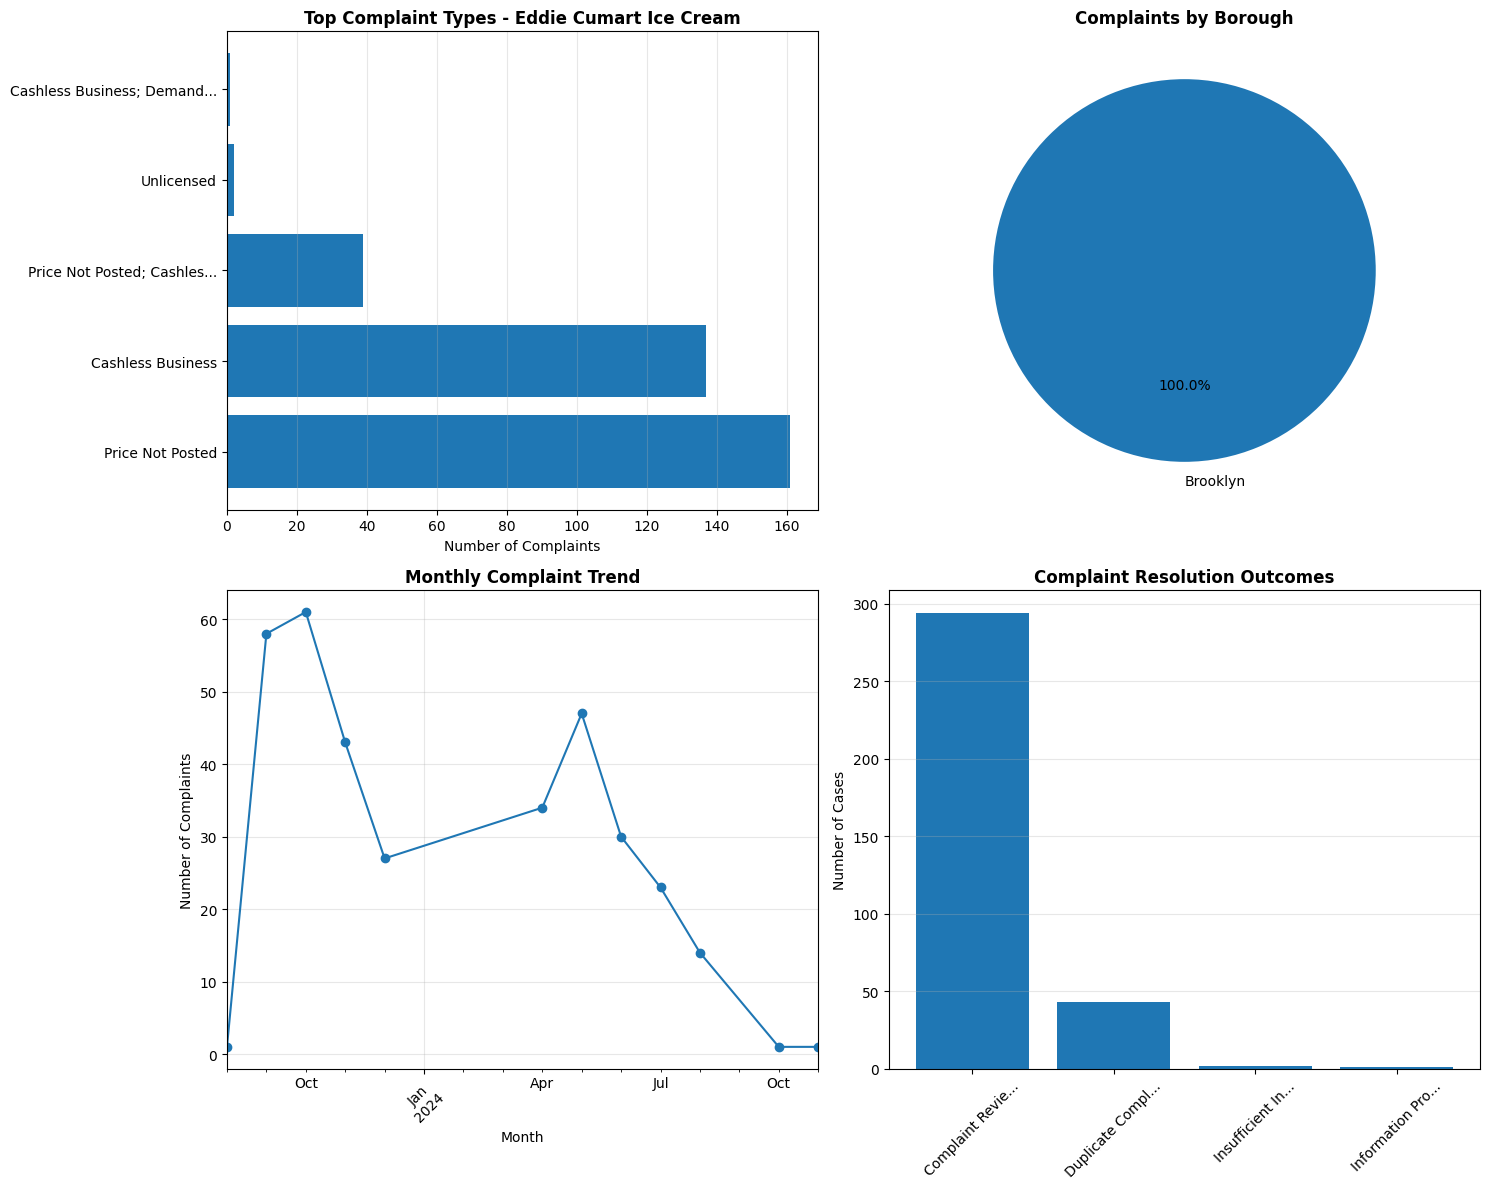

📊 Visualizations showing Eddie Cumart ice cream business complaint patterns


In [15]:
# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Top complaint types
top_complaints = complaint_types.head(8)
bars1 = ax1.barh(range(len(top_complaints)), top_complaints.values)
ax1.set_yticks(range(len(top_complaints)))
ax1.set_yticklabels([code[:25] + '...' if len(code) > 25 else code for code in top_complaints.index])
ax1.set_xlabel('Number of Complaints')
ax1.set_title('Top Complaint Types - Eddie Cumart Ice Cream', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Geographic distribution
ax2.pie(borough_dist.values, labels=borough_dist.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Complaints by Borough', fontweight='bold')

# Monthly trend (if dates available)
valid_dates = eddie_analysis[eddie_analysis['Intake Date'].notna()]
if len(valid_dates) > 0:
    monthly_counts = valid_dates.groupby(valid_dates['Intake Date'].dt.to_period('M')).size()
    monthly_counts.plot(kind='line', ax=ax3, marker='o')
    ax3.set_title('Monthly Complaint Trend', fontweight='bold')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Number of Complaints')
    ax3.grid(alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)
else:
    ax3.text(0.5, 0.5, 'No valid dates available', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Monthly Trend - No Data Available')

# Resolution outcomes
outcome_counts = eddie_analysis['Result'].value_counts()
bars4 = ax4.bar(range(len(outcome_counts)), outcome_counts.values)
ax4.set_xticks(range(len(outcome_counts)))
ax4.set_xticklabels([outcome[:15] + '...' if len(outcome) > 15 else outcome for outcome in outcome_counts.index], rotation=45)
ax4.set_ylabel('Number of Cases')
ax4.set_title('Complaint Resolution Outcomes', fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Visualizations showing Eddie Cumart ice cream business complaint patterns")


In [16]:
# Summary and key insights
print("🎯 KEY INSIGHTS ABOUT EDDIE CUMART'S ICE CREAM BUSINESS")
print("=" * 65)

print("📈 RANKING IMPACT:")
print(f"• After merging name variations, Eddie Cumart's business ranks #{int(eddie_rank)} in NYC")
print(f"• With {len(eddie_merged)} complaints, it's among the most complained-about businesses")
print(f"• The name merging revealed the true scale of complaints against this business")

print("\n🏆 BUSINESS PROFILE:")
print(f"• Business Type: {eddie_analysis['Business Category'].mode().iloc[0] if not eddie_analysis['Business Category'].mode().empty else 'Unknown'}")
print(f"• Primary Complaint: {complaint_types.index[0]} ({complaint_types.iloc[0]} cases)")
print(f"• Most Active Borough: {borough_dist.index[0]} ({borough_dist.iloc[0]} complaints)")
print(f"• Primary Channel: {channels.index[0]} ({channels.iloc[0]} complaints)")

print("\n⚠️ DATA QUALITY LESSON:")
print("• Multiple name variations can hide the true complaint volume for a business")
print("• Standardizing business names is crucial for accurate analysis")
print("• This business had 7 different name variations in the dataset")
print("• Without merging, the true complaint pattern would be missed")

print("\n💡 RECOMMENDATIONS:")
print("• DCWP should implement business name standardization")
print("• Use business license numbers or IDs for accurate tracking")
print("• Regular data cleaning to identify similar business names")
print("• Focus inspection efforts on businesses with high complaint volumes")

print(f"\n✅ ANALYSIS COMPLETE!")
print(f"Successfully merged {len(eddie_name_counts)} name variations into 1 standardized name")
print(f"All {len(eddie_merged)} complaint records are now properly attributed to Eddie Cumart's ice cream business")


🎯 KEY INSIGHTS ABOUT EDDIE CUMART'S ICE CREAM BUSINESS
📈 RANKING IMPACT:
• After merging name variations, Eddie Cumart's business ranks #1 in NYC
• With 340 complaints, it's among the most complained-about businesses
• The name merging revealed the true scale of complaints against this business

🏆 BUSINESS PROFILE:
• Business Type: Specialized Vending License - MFV
• Primary Complaint: Price Not Posted (161 cases)
• Most Active Borough: Brooklyn (326 complaints)
• Primary Channel: 311 (340 complaints)

⚠️ DATA QUALITY LESSON:
• Multiple name variations can hide the true complaint volume for a business
• Standardizing business names is crucial for accurate analysis
• This business had 7 different name variations in the dataset
• Without merging, the true complaint pattern would be missed

💡 RECOMMENDATIONS:
• DCWP should implement business name standardization
• Use business license numbers or IDs for accurate tracking
• Regular data cleaning to identify similar business names
• Focus i